In [1]:
import numpy as np
import random
import csv

import cognitive_GLVQ as cglvq
import cognitive_GLVQ2 as cglvq2
import optimizer as opt
import GLVQ as glvq

import matplotlib.pyplot as plt

In [2]:
classes = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
    "target": None
}

num_epochs = 100
num_prototypes = 4

## Data Preperation

In [3]:
# opening the CSV file
with open('dataset/iris_dataset.csv', mode ='r')as file:
   
  # reading the CSV file
    csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
    features = []
    labels = []
    for row in csvFile:
        feature = row[:-1]
        label = [classes[row[-1]]]
        features.append(feature)
        labels.append(label)
    features = np.array(features[1:], dtype=np.float64)
    labels = np.array(labels[1:], dtype=np.int32)

# Choosing prototypes
index_list = []
for i in range(3):
  index_i = np.where(labels == i)
  index_list.append(index_i[0])

prototype_index = []
for i in range(3):
  prototype_index_i = random.sample(list(index_list[i]),num_prototypes)
  prototype_index += prototype_index_i
prototype_index.sort(reverse=True)

prototypes = [(features[i],labels[i]) for i in prototype_index]

for i in prototype_index:
  features = np.delete(features, i, axis=0)
  labels = np.delete(labels, i, axis=0)

dataset = [(features[i],labels[i]) for i in range(len(features))]

permutation = np.random.permutation(len(dataset))
random.shuffle(dataset)
random.shuffle(prototypes)

train_set = dataset[:int(len(dataset)*0.8)]
test_set = dataset[int(len(dataset)*0.8):]

In [4]:
unique, count = np.unique(labels, return_counts=True)
dict(zip(unique, count))
classes = unique
classes = classes.tolist()

# Models

### GLVQ

In [5]:
model_glvq = glvq.GLVQ(prototypes,learning_rate=0.3)
hist = model_glvq.train(100,train_set,test_set)

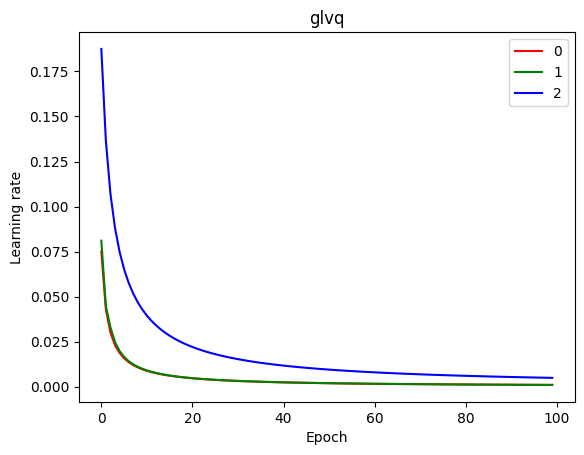

In [6]:
model_glvq.lr_graph("glvq")

### CP

In [7]:
model_cp = cglvq.CGLVQ(prototypes)
hist = model_cp.train(100,train_set,test_set,opt.conditional_probability)

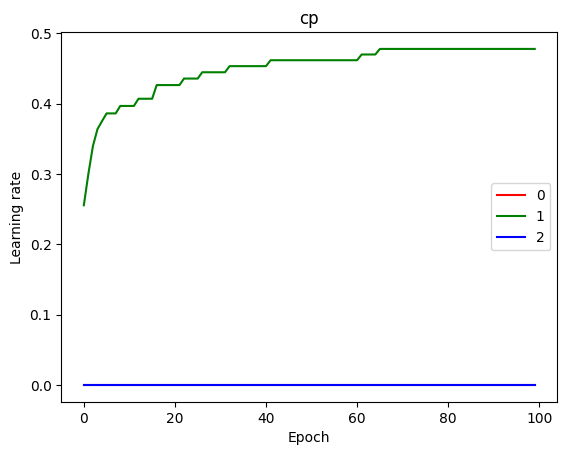

In [8]:
model_cp.lr_graph("cp")

### CP2

In [9]:
model_cp2 = cglvq2.CGLVQ(prototypes,0.3)
hist = model_cp2.train(100,train_set,test_set,opt.conditional_probability)

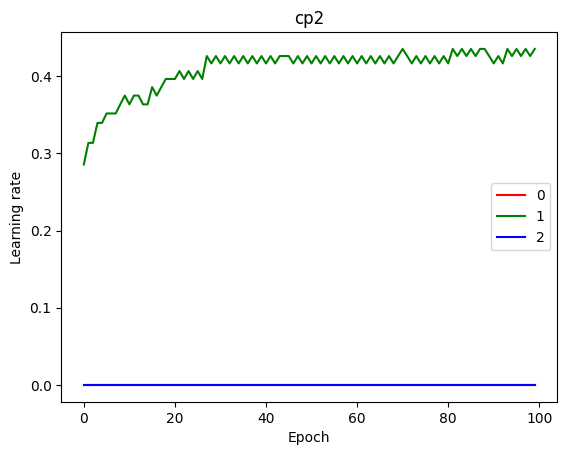

In [10]:
model_cp2.lr_graph("cp2")

### LS

In [11]:
model_ls = cglvq.CGLVQ(prototypes)
hist = model_ls.train(100,train_set,test_set,opt.loose_symmetry)


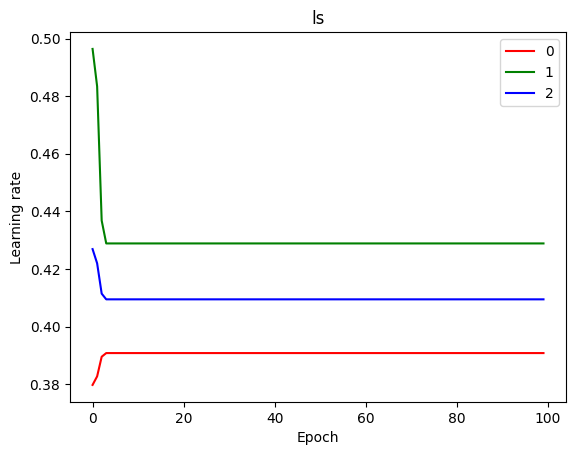

In [12]:
model_ls.lr_graph("ls")

### LS2

In [13]:
model_ls2 = cglvq2.CGLVQ(prototypes,0.3)
hist = model_ls2.train(100,train_set,test_set,opt.loose_symmetry)


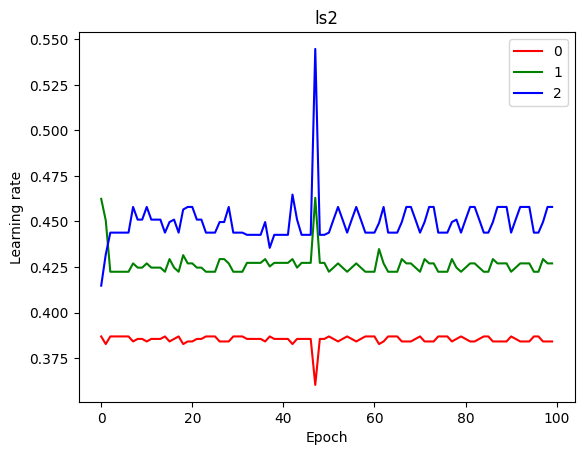

In [14]:
model_ls2.lr_graph("ls2")

### LSR

In [15]:
model_lsr = cglvq.CGLVQ(prototypes)
hist = model_lsr.train(100,train_set,test_set,opt.loose_symmetry_rarity)

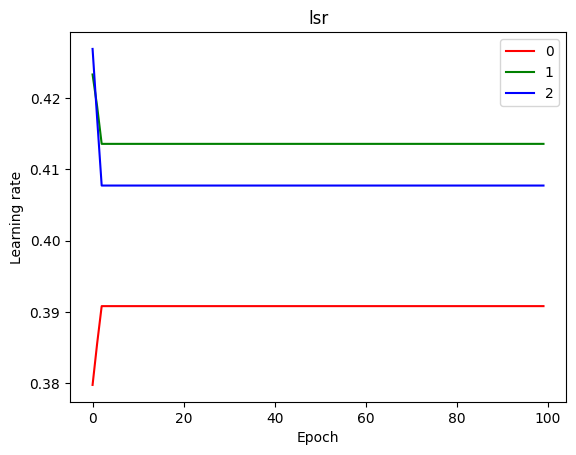

In [16]:
model_lsr.lr_graph("lsr")

### LSR 2

In [17]:
model_lsr2 = cglvq2.CGLVQ(prototypes,0.3)
hist = model_lsr2.train(100,train_set,test_set,opt.loose_symmetry_rarity)

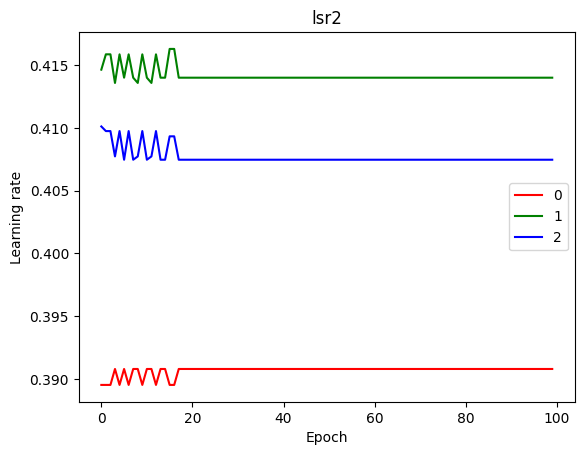

In [18]:
model_lsr2.lr_graph("lsr2")

### DFH

In [19]:
model_dfh = cglvq.CGLVQ(prototypes)
hist = model_dfh.train(100,train_set,test_set,opt.dual_factor_heuristic)

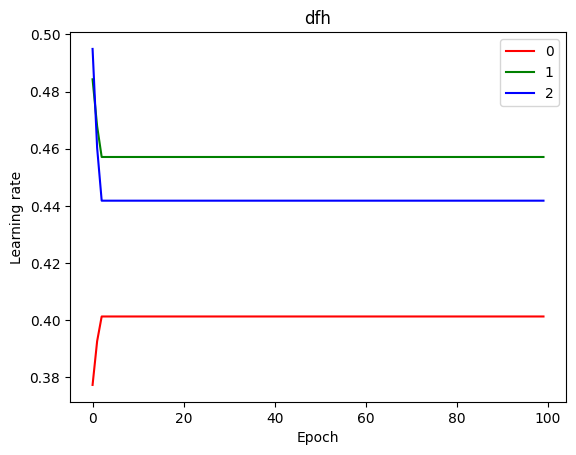

In [20]:
model_dfh.lr_graph("dfh")

### DFH 2

In [21]:
model_dfh2 = cglvq2.CGLVQ(prototypes,0.3)
hist = model_dfh2.train(100,train_set,test_set,opt.dual_factor_heuristic)

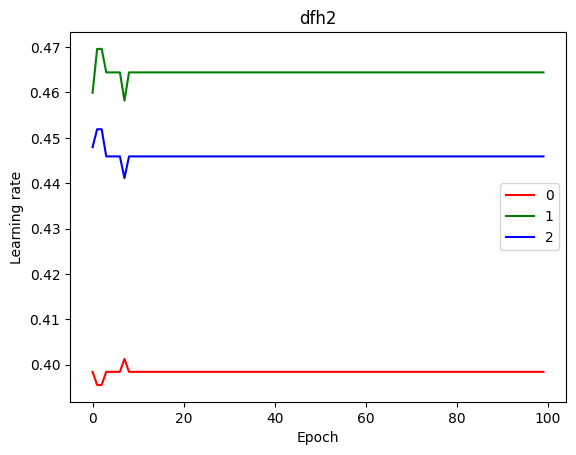

In [22]:
model_dfh2.lr_graph("dfh2")